(2, 2048, 2048, 1)
(2, 2048, 2048)


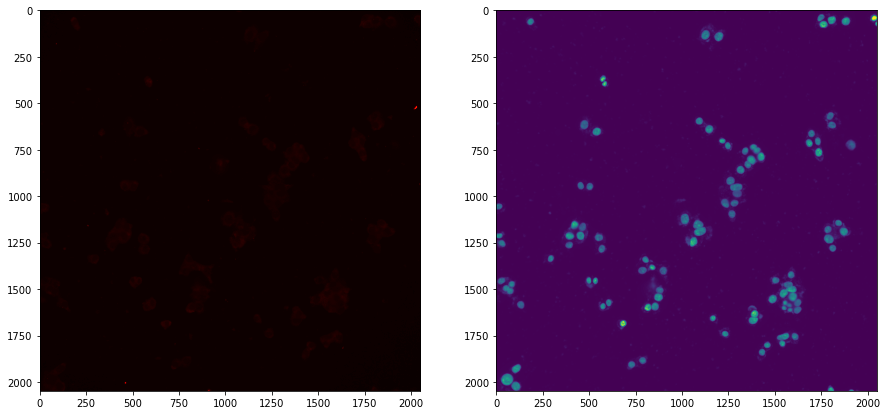

In [11]:
#step1 check the image information with one example 
import czifile
image =czifile.imread('/Volumes/Expansion/for_Xue_uu/xue 20231113 PLA/pakt/Snap610ctrlakt.czi')
print(image.shape)
# extract only channel 2 and format 2048x2048
image1=image[:,:,:,0]# 0 means this should be filtered
print(image1.shape)
# Extract the channels 
channel1 = image1[0,:,:]
channel2 = image1[1,:,:]
# view the channels
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(channel1,cmap='hot')
axs[1].imshow(channel2)
import tifffile

tifffile.imwrite('/Volumes/Expansion/for_Xue_uu/xue 20231113 PLA/pakt/output_tiff/Snap610ctrlakt_ch1.tif', channel1)
tifffile.imwrite('/Volumes/Expansion/for_Xue_uu/xue 20231113 PLA/pakt/output_tiff/Snap610ctrlakt_ch2.tif', channel2)

In [12]:
# step2 split channels
import czifile
import tifffile
import os

# Input directory containing the CZI files
input_dir = '/Volumes/Expansion/for_Xue_uu/xue 20231113 PLA/pakt'
# Output directory for TIFF files
output_dir = '/Volumes/Expansion/for_Xue_uu/xue 20231113 PLA/pakt/output_tiff'
os.makedirs(output_dir, exist_ok=True)

# List all CZI files in the input directory
czi_files = [f for f in os.listdir(input_dir) if f.endswith('.czi')]

for czi_file in czi_files:
    # Load the CZI image
    image = czifile.imread(os.path.join(input_dir, czi_file))

    # Extract the channels (assuming a specific channel order, you may need to adapt this)
    image1 = image[:,:,:,0]

    # Save each channel as a separate TIFF file # the number of range is defined by the index of channels
    for channel_number in range(2):
        channel = image1[channel_number,:,:]
        channel_name = f'{os.path.splitext(czi_file)[0]}_ch{channel_number + 1}.tif'
        channel_path = os.path.join(output_dir, channel_name)
        tifffile.imwrite(channel_path, channel)
        print(f"Converted {czi_file} to {channel_name}")

Converted Snap610ctrlakt.czi to Snap610ctrlakt_ch1.tif
Converted Snap610ctrlakt.czi to Snap610ctrlakt_ch2.tif
Converted Snap611100akt.czi to Snap611100akt_ch1.tif
Converted Snap611100akt.czi to Snap611100akt_ch2.tif
Converted Snap612prl250akt.czi to Snap612prl250akt_ch1.tif
Converted Snap612prl250akt.czi to Snap612prl250akt_ch2.tif
Converted Snap613prl500akt.czi to Snap613prl500akt_ch1.tif
Converted Snap613prl500akt.czi to Snap613prl500akt_ch2.tif
